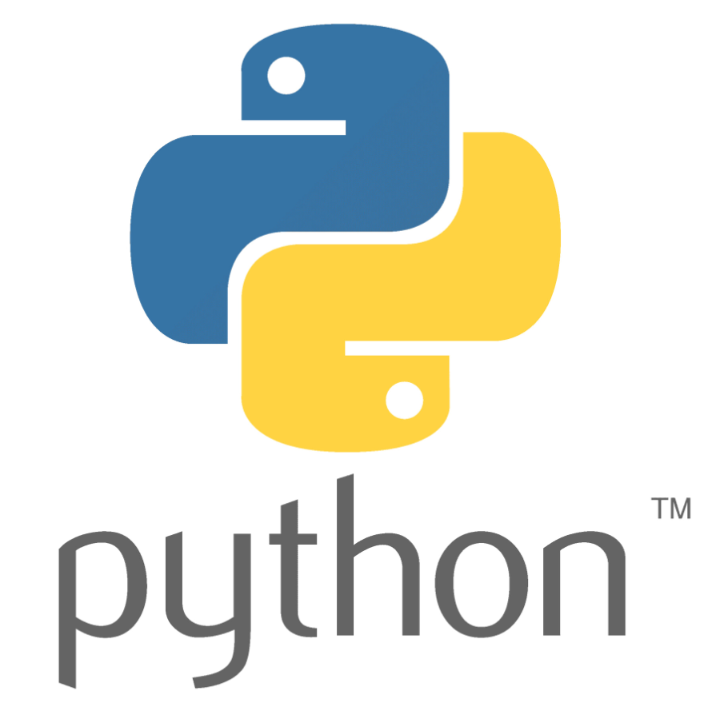


<h3 style="text-align: center;"><b>Семинар №12 ФЭФМ МФТИ</b></h3>

# Повторение

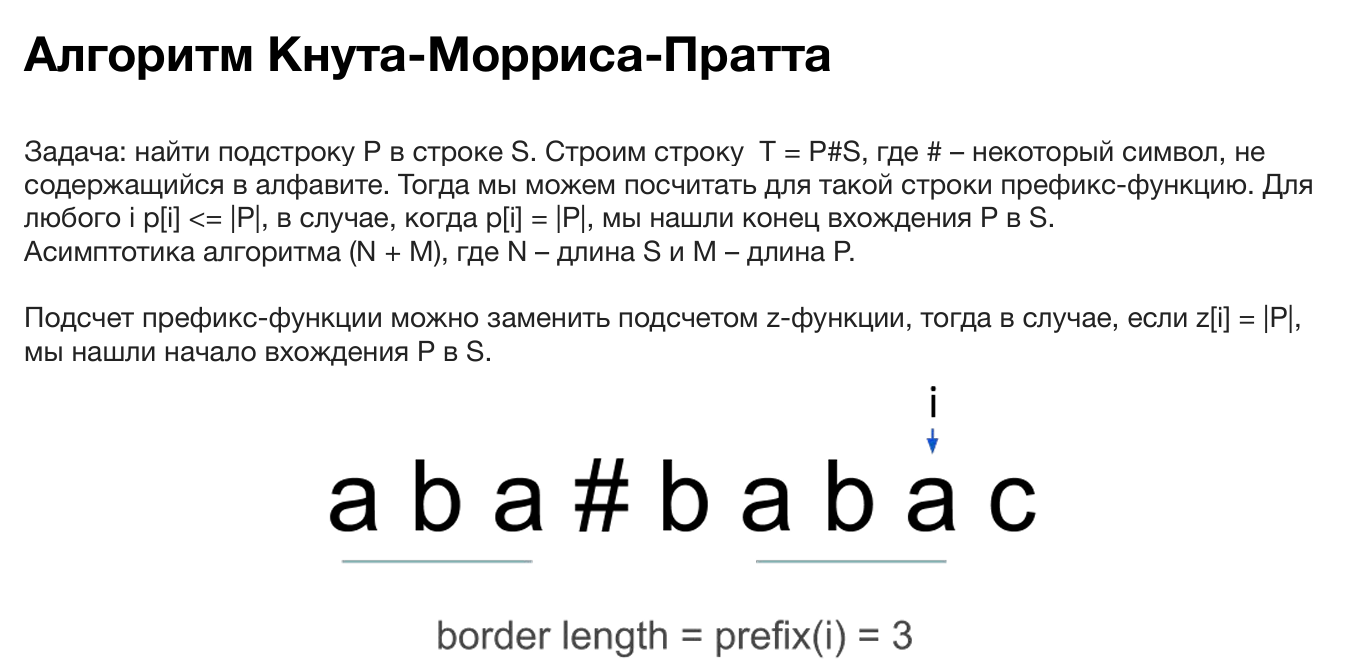

In [5]:
def prefix_function(s):
    n = len(s)
    pi = [0] * n
    for i in range(1, n):
        j = pi[i - 1]
        while j > 0 and s[i] != s[j]:
            j = pi[j - 1]
        if s[i] == s[j]:
            j += 1
        pi[i] = j
    return pi

def kmp_search(text, pattern):
    combined = pattern + "#" + text
    pi = prefix_function(combined)
    pattern_length = len(pattern)
    result = []

    for i in range(pattern_length + 1, len(pi)):
        if pi[i] == pattern_length:
            result.append(i - 2 * pattern_length)

    return result

text = "aaabaabaaab"
pattern = "aab"
positions = kmp_search(text, pattern)
print("Паттерн найден в позициях", positions)

Паттерн найден в позициях [1, 4, 8]


# Хеш

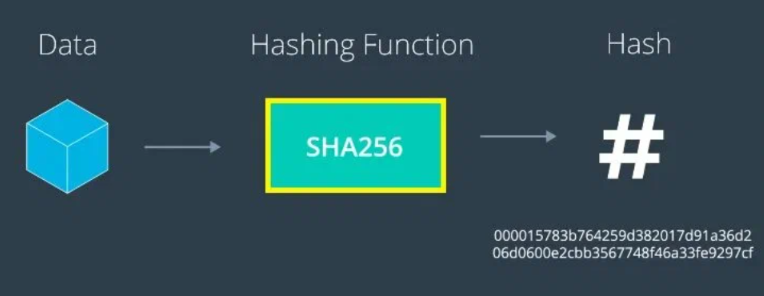

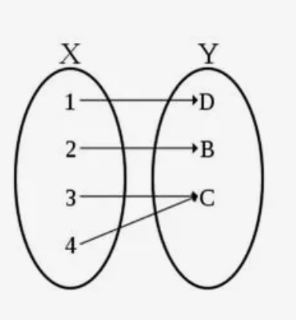

Линейное пробирование — это метод открытой адресации, при котором при коллизии мы просто переходим к следующему индексу в массиве. Если и там есть элемент, переходим к следующему и так далее, пока не найдем свободный индекс.

Квадратичное пробирование использует квадратичную функцию для определения следующего индекса при коллизии. Это помогает уменьшить кластеризацию элементов.

In [39]:
import hashlib

def hash_string(input_string, algorithm='sha256'):
    hash_object = hashlib.sha256()
    hash_object.update(input_string.encode('utf-8'))
    return hash_object.hexdigest()

input_string = "Привет, мир!"
hashed_string = hash_string(input_string)
print(f"Хеш '{input_string}': {hashed_string}")

Хеш 'Привет, мир!': 9a0af011605a6ab9022f248fb797064a42782210ac91e834348b3ef089313e5f


In [45]:
import hmac

key = b'secret_key'
message = b'Hello, World!'
hmac_object = hmac.new(key, message, hashlib.sha256)

hex_dig = hmac_object.hexdigest()
print(hex_dig)

d0e72e3ebca850380c42bc96009638375860cb5c330048588d3298f02e740065


In [47]:
def hash_function(input_string):
    hash_value = 0
    prime = 31 
    modulus = 10**9 + 7
    for char in input_string:
        ascii_val = ord(char)
        hash_value = (hash_value * prime + ascii_val) % modulus
    
    return hash_value

input_str = "Hello, World!"
hashed_value = hash_function(input_str)
print(f"Хеш-значение для '{input_str}': {hashed_value}")

Хеш-значение для 'Hello, World!': 370662379


In [53]:
input_str = "Hello, World!"
hashed_value = hash(input_str)

print(f"Хеш-значение для '{input_str}': {hashed_value}")

Хеш-значение для 'Hello, World!': -1158758723422481246


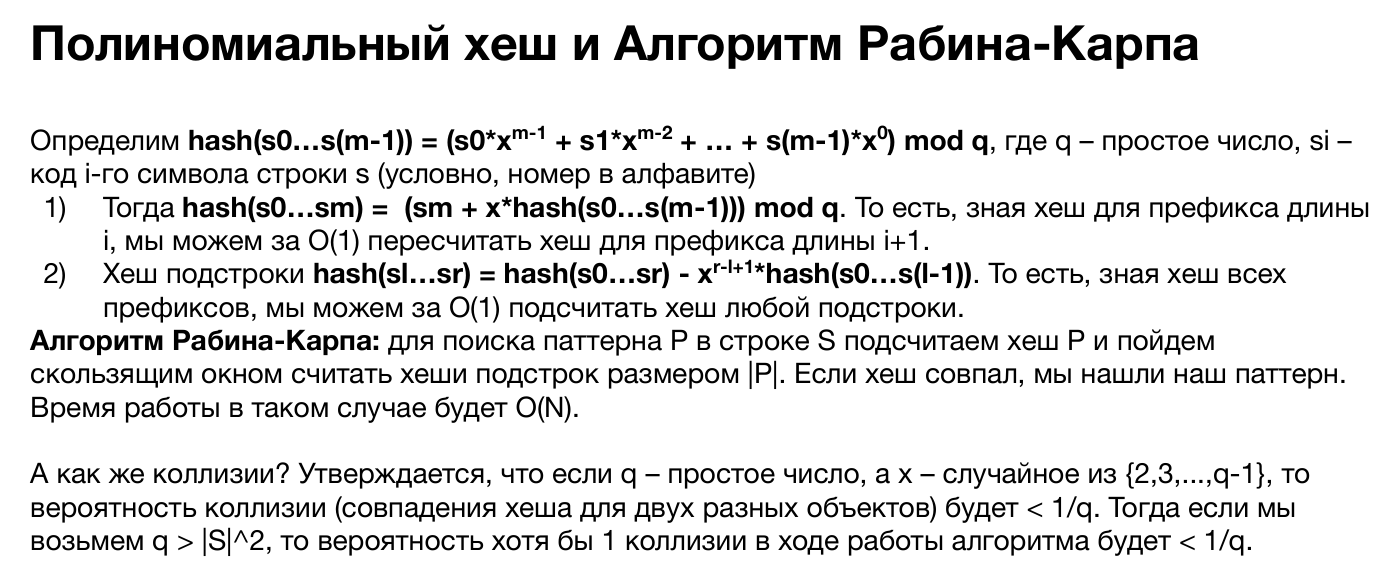

In [78]:
import hashlib

def hash_string(s):
    return hashlib.sha256(s.encode()).hexdigest()

def find_period_hashlib(s):
    n = len(s)
    for p in range(1, n):  # Перебираем возможные длины периода
        if n % p == 0:  # Период возможен только если длина делится на p
            base_hash = hash_string(s[:p])  # Хеш первой подстроки длины p
            ok = True
            
            for i in range(p, n, p):  # Проверяем, совпадают ли все части
                if hash_string(s[i:i + p]) != base_hash:
                    ok = False
                    break
            
            if ok:
                return p  # Нашли минимальный период

    return n  # Если нет меньшего периода, строка сама себе период

print(find_period_hashlib("ababab"))  
print(find_period_hashlib("aaaaaa"))    
print(find_period_hashlib("abcabcabc"))   
print(find_period_hashlib("abcdef")) 

2
1
3
6


In [80]:
import hashlib

def hash_string(s):
    return hashlib.sha256(s.encode()).hexdigest()

def kmp_hashlib_search(text, pattern):
    n, m = len(text), len(pattern)
    pattern_hash = hash_string(pattern)  # Хеш паттерна
    result = []

    for i in range(n - m + 1):  # Перебираем все возможные сдвиги
        if hash_string(text[i:i + m]) == pattern_hash:
            if text[i:i + m] == pattern:  # Дополнительная проверка (на случай коллизий)
                result.append(i)

    return result

text = "aaabaabaaab"
pattern = "aab"
positions = kmp_hashlib_search(text, pattern)
print("Паттерн найден в позициях", positions)

Паттерн найден в позициях [1, 4, 8]


# Алгоритм Манакера

Дана строка s длины n. Требуется найти все такие пары (i,j), где i<j, что подстрока s[i....j] является палиндромом (т.е. читается одинаково слева направо и справа налево)

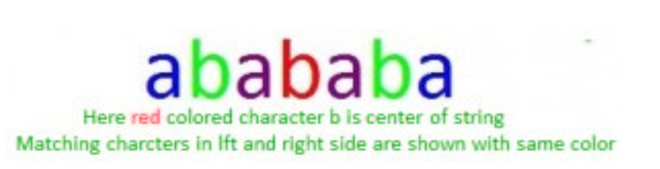

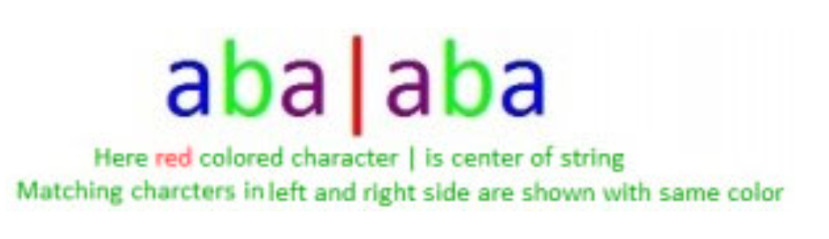

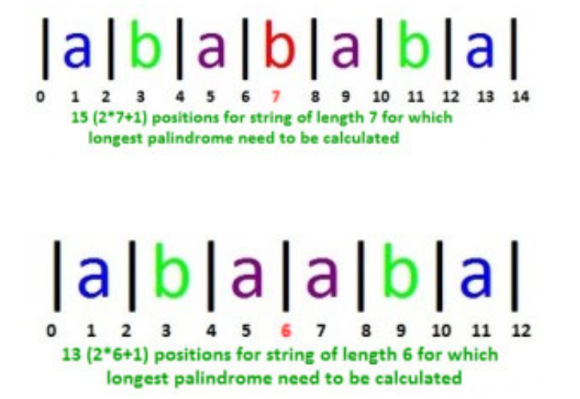

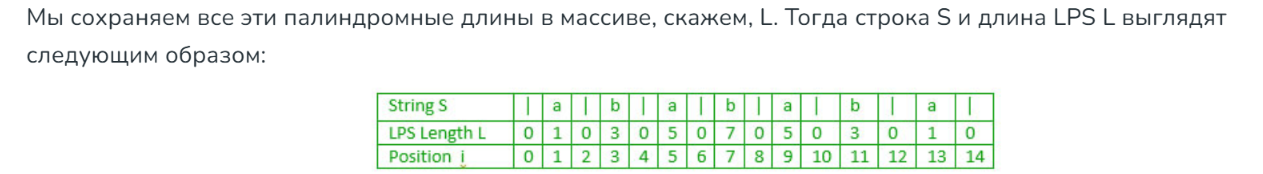

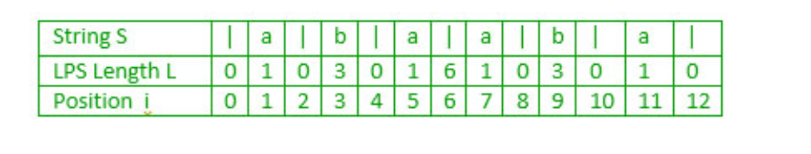

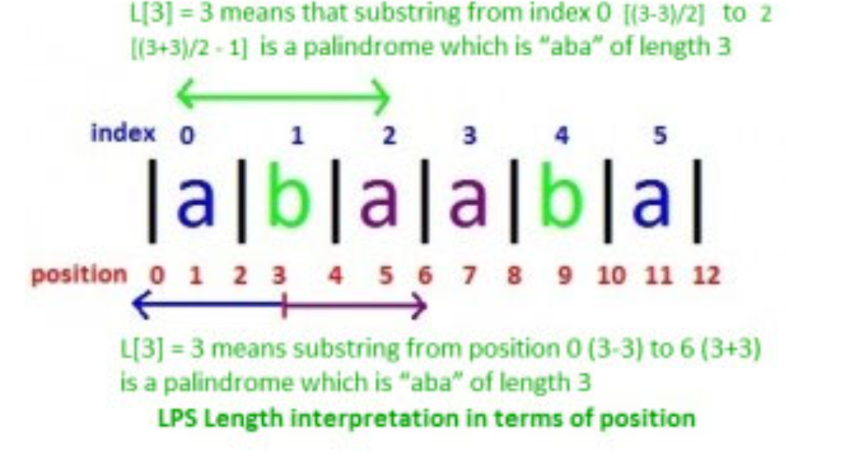

Для строки «abababa» мы видим следующее:

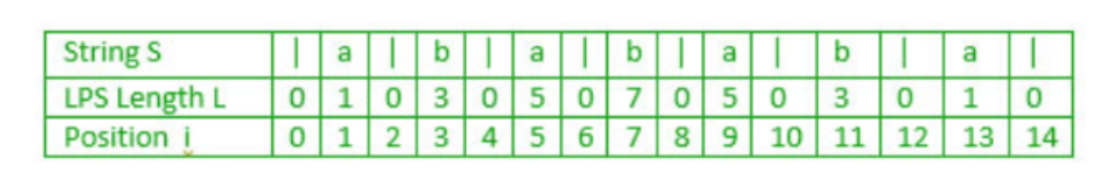

Всегда ли значения длины LPS вокруг центральной позиции палиндрома симметричны (одинаковы)? Ответ — НЕТ

Положения 1 и 5 (вокруг положения 3) не симметричны. Аналогично, положения 9 и 13 (вокруг положения 11) не симметричны. 

Нам нужен, который будет заключаться в том, чтобы рассматривать каждый символ в строке как потенциальный центр палиндрома и проверять, какой самый длинный палиндром можно построить вокруг этого центра

In [22]:
def findLongest(text): 
    N = len(text) 
    if N == 0: 
        return

    # Преобразуем строку, добавляя виртуальные границы (неявно)
    N = 2 * N + 1  # Новая длина для виртуальной строки
    L = [0] * N    # Массив для хранения радиусов палиндромов

    L[0] = 0
    L[1] = 1

    C = 1     # Центр текущего палиндрома
    R = 2     # Правая граница текущего палиндрома

    maxLPSLength = 0
    maxLPSCenterPosition = 0

    print("\nАнализ строки:", text)

    for i in range(2, N):
        iMirror = 2 * C - i
        L[i] = 0
        diff = R - i

        if diff > 0:
            L[i] = min(L[iMirror], diff)

        # строго проверяем, не выйдем ли за границы
        while (i + L[i] < N) and (i - L[i] > 0):
            left_index = (i - L[i] - 1) // 2
            right_index = (i + L[i] + 1) // 2

            # Чётная позиция — между символами: расширяем без проверки
            if (i + L[i] + 1) % 2 == 0:
                L[i] += 1
            # Нечётная позиция — символы: сравниваем символы строки
            elif left_index >= 0 and right_index < len(text) and text[left_index] == text[right_index]:
                L[i] += 1
            else:
                break

        # oбновляем максимум, если найден новый самый длинный палиндром
        if L[i] > maxLPSLength:
            maxLPSLength = L[i]
            maxLPSCenterPosition = i

        # Если палиндром выходит за правую границу — обновляем центр и правую границу
        if i + L[i] > R:
            C = i
            R = i + L[i]

        print(f"Позиция {i}: Центр зеркала={iMirror}, Длина палиндрома={L[i]}")

    # что тут делаем?
    start = (maxLPSCenterPosition - maxLPSLength) // 2
    end = start + maxLPSLength - 1

    # end+1- зачем?)
    print("Максимальный палиндром:", text[start:end+1], "| Индексы:", start, "до", end)
    print("-" * 40)

texts = [
    "babcbabcbaccba",
    "abaaba",
    "abababa",
    "abcbabcbabcba",
    "caba",
    "abacdedcaba"
]

for txt in texts:
    findLongest(txt)


Анализ строки: babcbabcbaccba
Позиция 2: Центр зеркала=0, Длина палиндрома=0
Позиция 3: Центр зеркала=-1, Длина палиндрома=3
Позиция 4: Центр зеркала=2, Длина палиндрома=0
Позиция 5: Центр зеркала=1, Длина палиндрома=1
Позиция 6: Центр зеркала=0, Длина палиндрома=0
Позиция 7: Центр зеркала=-1, Длина палиндрома=7
Позиция 8: Центр зеркала=6, Длина палиндрома=0
Позиция 9: Центр зеркала=5, Длина палиндрома=1
Позиция 10: Центр зеркала=4, Длина палиндрома=0
Позиция 11: Центр зеркала=3, Длина палиндрома=9
Позиция 12: Центр зеркала=10, Длина палиндрома=0
Позиция 13: Центр зеркала=9, Длина палиндрома=1
Позиция 14: Центр зеркала=8, Длина палиндрома=0
Позиция 15: Центр зеркала=7, Длина палиндрома=5
Позиция 16: Центр зеркала=6, Длина палиндрома=0
Позиция 17: Центр зеркала=5, Длина палиндрома=1
Позиция 18: Центр зеркала=4, Длина палиндрома=0
Позиция 19: Центр зеркала=3, Длина палиндрома=1
Позиция 20: Центр зеркала=2, Длина палиндрома=0
Позиция 21: Центр зеркала=1, Длина палиндрома=1
Позиция 22: Це

# Префиксное дерево

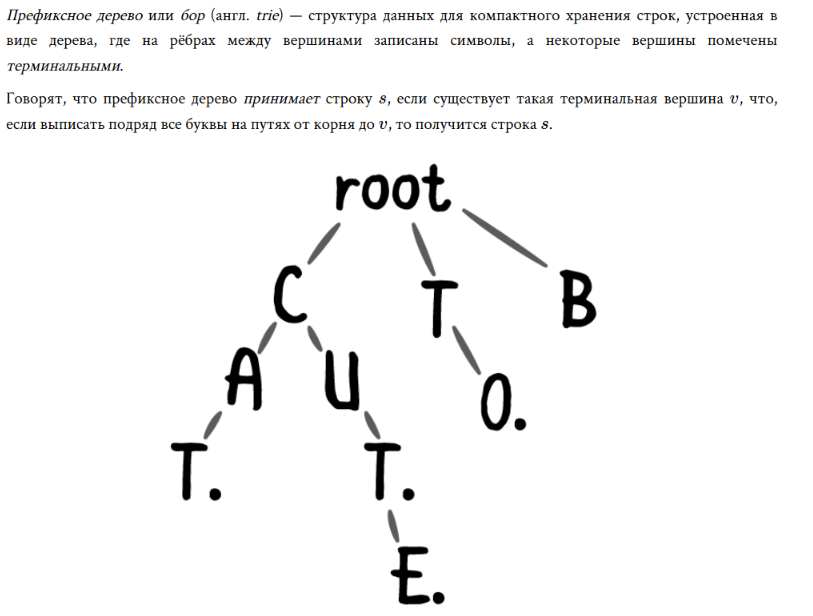

In [35]:
from collections import defaultdict

class TrieNode:
    def __init__(self):
        self.children = defaultdict(TrieNode)  
        self.is_end_of_word = False  # флаг конца слова

class Trie:
    def __init__(self):
        self.root = TrieNode()  # корень дерева

    def insert(self, word):
        node = self.root
        for char in word:
            node = node.children[char]  # Переходим к следующему узлу
        node.is_end_of_word = True  # Устанавливаем флаг, что слово завершилось

    def dfs(self, node, prefix=""):
        if node.is_end_of_word:
            print(prefix)
        for char, child_node in node.children.items():
            self.dfs(child_node, prefix + char)

    def traverse(self):
        self.dfs(self.root)

trie = Trie()
words = ["apple", "app", "banana", "band"]
for word in words:
    trie.insert(word)

trie.traverse()

app
apple
banana
band


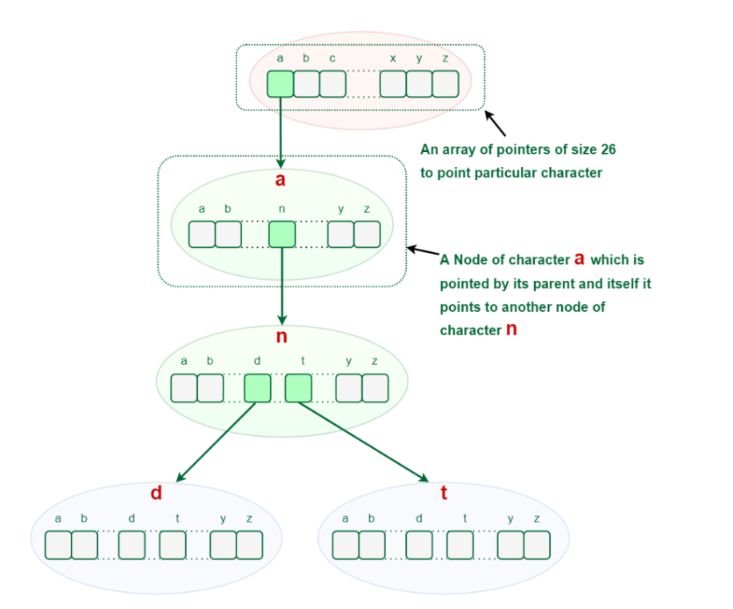

In [7]:
class TrieNode:
    def __init__(self):
        self.children = [None] * 26
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()
    
    def _char_to_index(self, char):
        return ord(char) - ord('a')
    
    def insert(self, word):
        node = self.root
        for char in word:
            index = self._char_to_index(char)
            if node.children[index] is None:
                node.children[index] = TrieNode()
            node = node.children[index]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            index = self._char_to_index(char)
            if node.children[index] is None:
                return False
            node = node.children[index]
        return node.is_end_of_word

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            index = self._char_to_index(char)
            if node.children[index] is None:
                return False
            node = node.children[index]
        return True

    def _dfs(self, node, prefix):
        if node.is_end_of_word:
            print(prefix)
        for i in range(26):
            child = node.children[i]
            if child is not None:
                self._dfs(child, prefix + chr(i + ord('a')))

    def traverse(self):
        self._dfs(self.root, "")

trie = Trie()
words = ["apple","applause", "app", "zoo","banana", "band"]
for word in words:
    trie.insert(word)

print("Алфавитный порядок:")
trie.traverse()

Алфавитный порядок:
app
applause
apple
banana
band
zoo


Сжатые префиксные деревья
Это особый подвид префиксных деревьев, заслуживающий отдельного внимания.

В таких деревьях мы сжимаем структуру за счет размещения в вершине не одной буквы, а сразу целого фрагмента префикса. При этом из каждого элемента этого префикса существует строго одна связь с другим элементом префикса.

Такие деревья гораздо удобнее использовать для чтения информации за счет уменьшения количества переходов по ссылкам между вершинами.

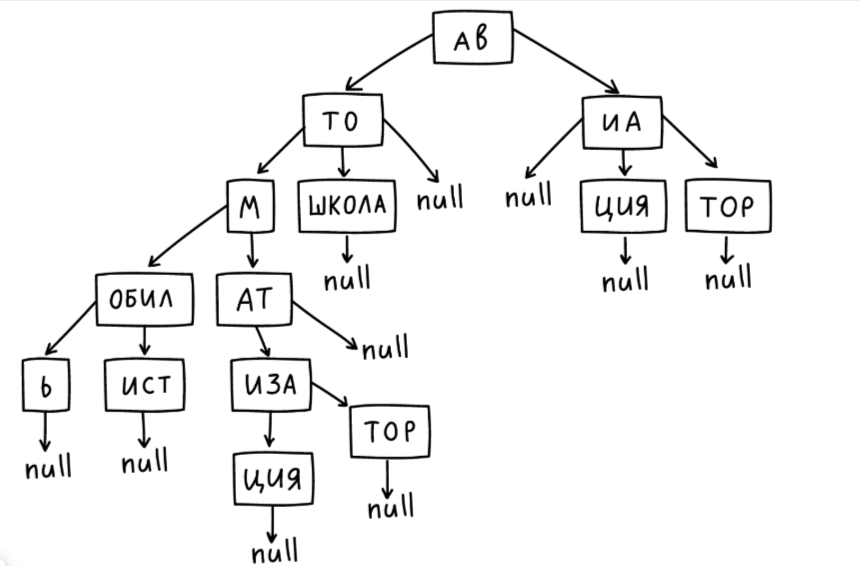

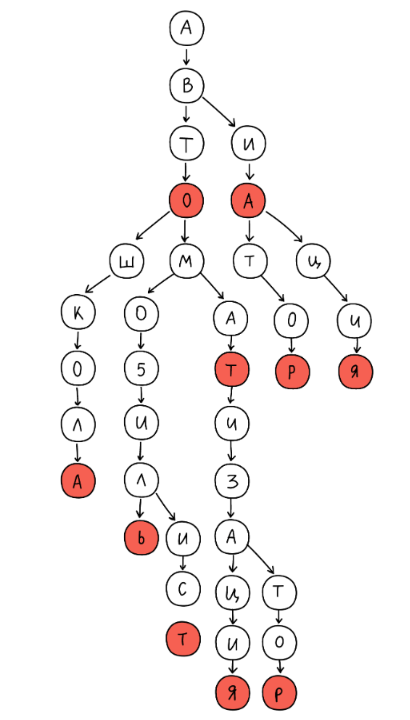

In [77]:
class CompressedTrieNode:
    def __init__(self):
        self.children = {}  # В отличие от обычного Trie, ключ — это часть слова, а не один символ
        self.is_end_of_word = False

class CompressedTrie:
    def __init__(self):
        self.root = CompressedTrieNode()

    def insert(self, word):
        node = self.root
        while word:
            for edge, child in node.children.items():
                i = 0
                while i < min(len(word), len(edge)) and word[i] == edge[i]:
                    i += 1

                if i > 0:
                    if i == len(edge):
                        node = child
                        word = word[i:]
                        break
                    else:
                        # Здесь происходит разбиение ребра edge на две части:
                        # первая часть остаётся в текущем узле, вторая уходит в потомка
                        existing_child = child
                        new_child = CompressedTrieNode()
                        new_child.children[edge[i:]] = existing_child
                        new_child.is_end_of_word = existing_child.is_end_of_word
                        existing_child.is_end_of_word = False

                        node.children[edge[:i]] = new_child
                        del node.children[edge]

                        if word[i:]:
                            leaf = CompressedTrieNode()
                            leaf.is_end_of_word = True
                            new_child.children[word[i:]] = leaf
                        else:
                            new_child.is_end_of_word = True
                        return
            else:
                # В отличие от обычного Trie, мы добавляем сразу оставшуюся строку
                leaf = CompressedTrieNode()
                leaf.is_end_of_word = True
                node.children[word] = leaf
                return

    def dfs(self, node, prefix=""):
        if node.is_end_of_word:
            print(prefix)
        for edge, child in node.children.items():
            self.dfs(child, prefix + edge)

    def traverse(self):
        self.dfs(self.root)

    def visualize(self, node=None, prefix="", indent=""):
        if node is None:
            node = self.root
        for edge, child in node.children.items():
            end_marker = " [word]" if child.is_end_of_word else ""
            print(f"{indent}└─ {edge}{end_marker}")
            self.visualize(child, prefix + edge, indent + "   ")


trie = CompressedTrie()
words = ["apple", "app", "banana", "band"]
for word in words:
    trie.insert(word)

print("Слова в дереве:")
trie.traverse()

print("\nСтруктура дерева:")
trie.visualize()

Слова в дереве:
app
ban
band

Структура дерева:
└─ app [word]
   └─ le
└─ ban [word]
   └─ ana
   └─ d [word]


# Алгоритм Ахо-Корасика

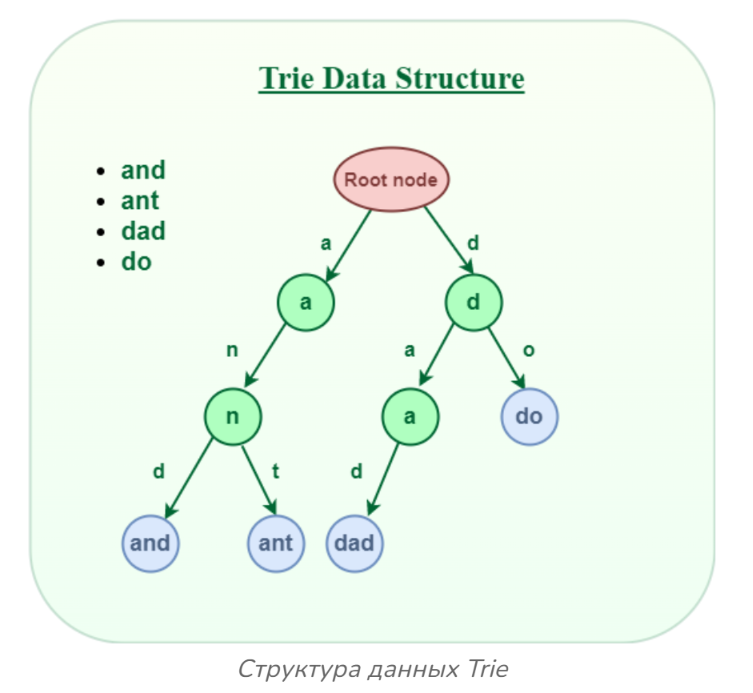

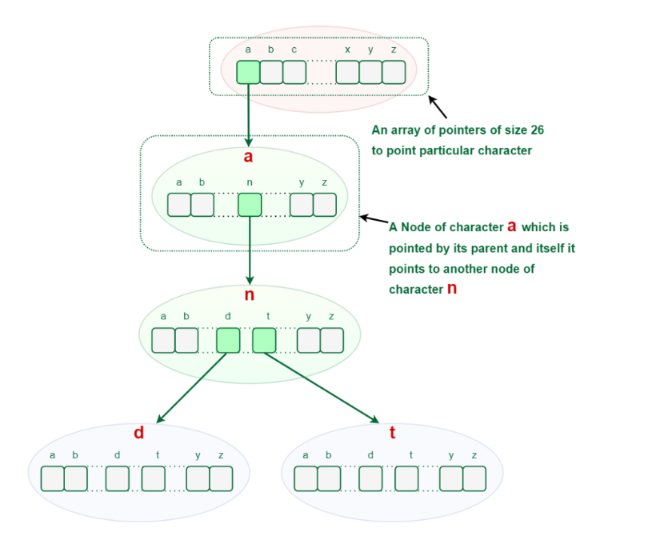

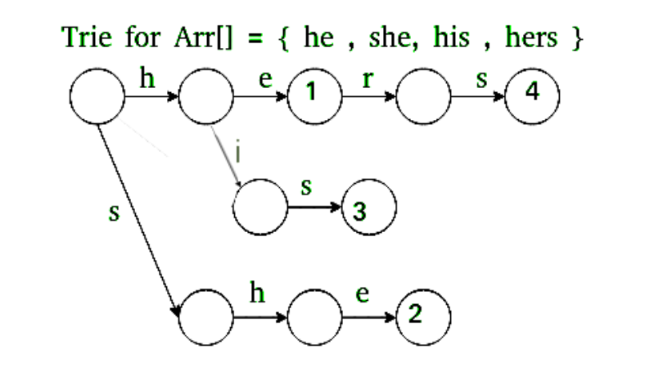

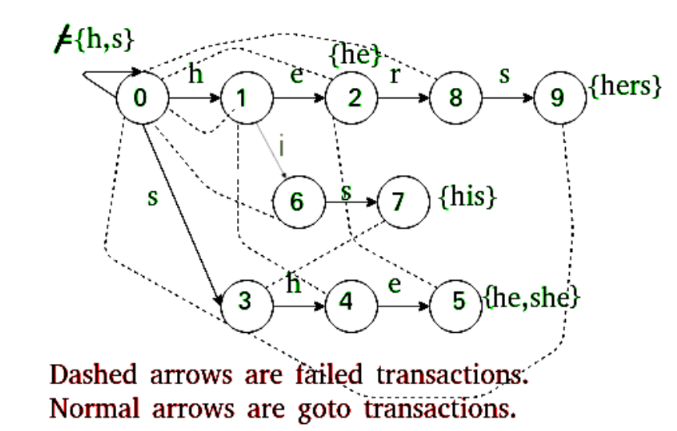

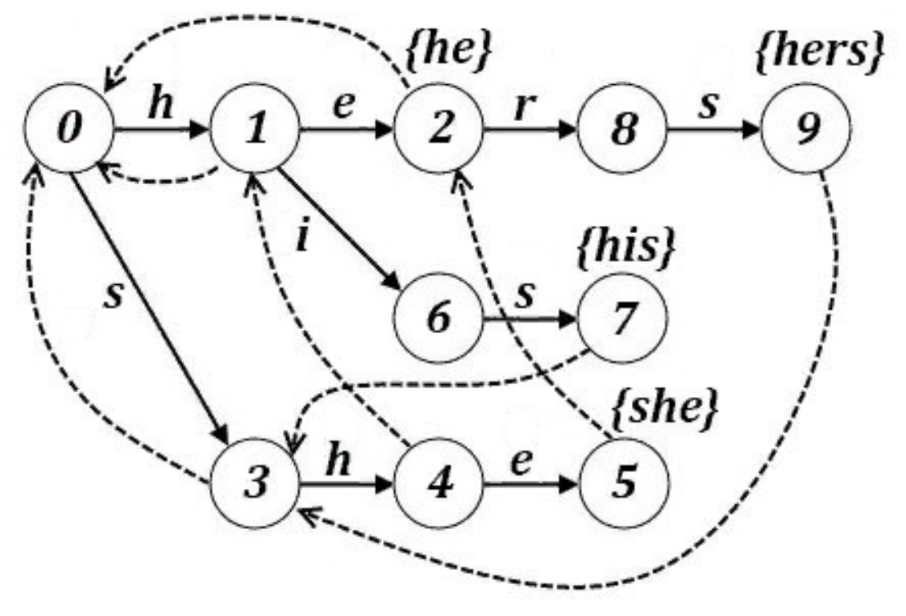

Представьте, что вы ищете слово в книге. Вы начинаете с первой страницы и читаете слово за словом, пока не найдете то, что ищете. Но что если слово, которое вы ищете, не на этой странице? Вы не будете возвращаться к первой странице и начинать заново, правда)? Вы будете переворачивать страницу и продолжать поиск на следующей странице.
fail[state] указывает, куда перейти, если символ не подошёл — но без возвращения в начало!
Мы идём туда, где уже построен похожий префикс, и экономим время

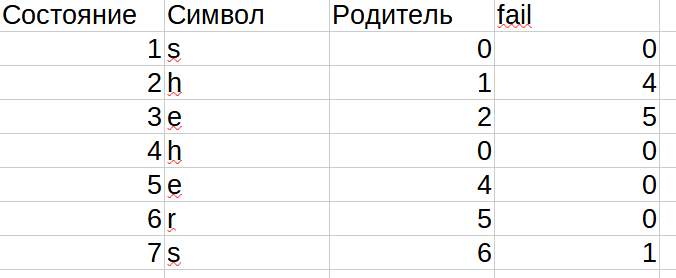

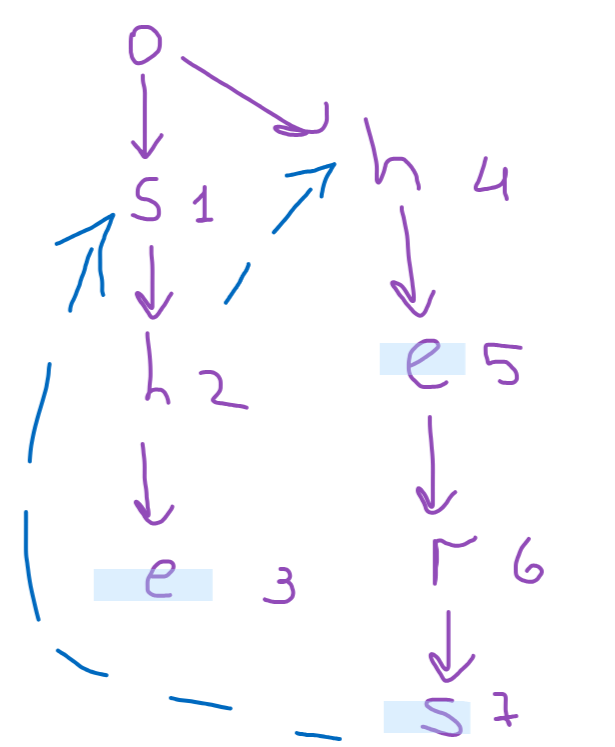

In [16]:
from collections import defaultdict

class AhoCorasick:
    def __init__(self, words):
        self.words = [word.lower() for word in words]
        self._build_machine()

    def _build_machine(self):
        self.goto = [defaultdict(int)] 
        self.fail = [0]  # функция неудачи
        self.out = [[] for i in range(1)]  
        
        # Построение trie-дерева
        for i, word in enumerate(self.words):
            state = 0
            for ch in word:
                if ch not in self.goto[state]:
                    self.goto[state][ch] = len(self.goto)
                    self.goto.append(defaultdict(int))
                    self.fail.append(0)
                    self.out.append([])
                state = self.goto[state][ch]
            self.out[state].append(i)  # сохраняем индекс слова
        
        # Построение функции неудачи с помощью BFS
        queue = []
        # Для корня (state=0) устанавливаем переходы для всех символов, которых нет в детях
        for ch, state in self.goto[0].items():
            queue.append(state)
            self.fail[state] = 0
        
        while queue:
            current = queue.pop(0)
            for ch, state in self.goto[current].items():
                queue.append(state)
                # Ищем самое длинное совпадающее окончание
                fail_state = self.fail[current]
                while fail_state != 0 and ch not in self.goto[fail_state]:
                    fail_state = self.fail[fail_state]
                self.fail[state] = self.goto[fail_state].get(ch, 0)
                # Добавляем выходы из fail-состояния
                self.out[state].extend(self.out[self.fail[state]])

    def search(self, text):
        text = text.lower()
        current_state = 0
        result = defaultdict(list)
        
        for pos, ch in enumerate(text):
            # Переход с использованием функции неудачи, если нет прямого перехода
            while current_state != 0 and ch not in self.goto[current_state]:
                current_state = self.fail[current_state]
            current_state = self.goto[current_state].get(ch, 0)
            
            # Добавляем все совпадения в текущем состоянии
            for word_idx in self.out[current_state]:
                word = self.words[word_idx]
                start = pos - len(word) + 1
                result[word].append(start)
        
        return result

if __name__ == "__main__":
    words = ["he", "she", "hers", "his"]
    text = "ahishers"
    ac = AhoCorasick(words)
    matches = ac.search(text)
    for word, positions in matches.items():
        for start in positions:
            print(f"Слово '{word}' найдено с {start} по {start + len(word) - 1}")

Слово 'his' найдено с 1 по 3
Слово 'she' найдено с 3 по 5
Слово 'he' найдено с 4 по 5
Слово 'hers' найдено с 4 по 7


# Контест

## Task1

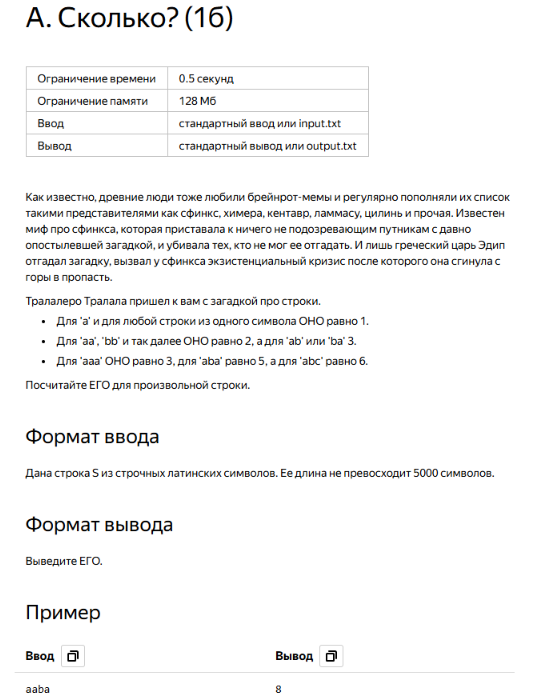

Для 'aaba':

Список уникальных подстрок: 'a', 'b', 'aa', 'ab', 'ba', 'aab', 'aba', 'aaba'  8штук

In [21]:
def task1(s):
    answer = set()  
    for length in range(1, len(s) + 1):
        for i in range(len(s) - length + 1):
            x = s[i:i + length]
            answer.add(x)
    return len(answer), answer

s = "abc"
print(f"Количество уникальных подстрок в '{s}': {task1(s)}")

s = "aaa"
print(f"Количество уникальных подстрок в '{s}': {task1(s)}")

Количество уникальных подстрок в 'abc': (6, {'bc', 'abc', 'c', 'b', 'a', 'ab'})
Количество уникальных подстрок в 'aaa': (3, {'a', 'aa', 'aaa'})


In [ ]:
class SuffixTree:
    def __init__(self, string):
        self.root = {}
        self.build_tree(string)

    def build_tree(self, string):
        for i in range(len(string)):
            node = self.root
            for j in range(i, len(string)):
                if string[j] not in node:
                    node[string[j]] = {}
                node = node[string[j]]

    def task1(self):
        unique_substrings = set()
        def dfs(node, substring):
            if substring:
                unique_substrings.add(substring)
            for char, child_node in node.items():
                dfs(child_node, substring + char)

        dfs(self.root, "")
        return len(unique_substrings)

s = "abc"
tree = SuffixTree(s)

print(f"Количество уникальных подстрок в '{s}': {tree.task1()}")

s = "aaa"
tree = SuffixTree(s)
print(f"Количество уникальных подстрок в '{s}': {tree.task1()}")

TypeError: object of type 'SuffixTree' has no len()

## Task 2

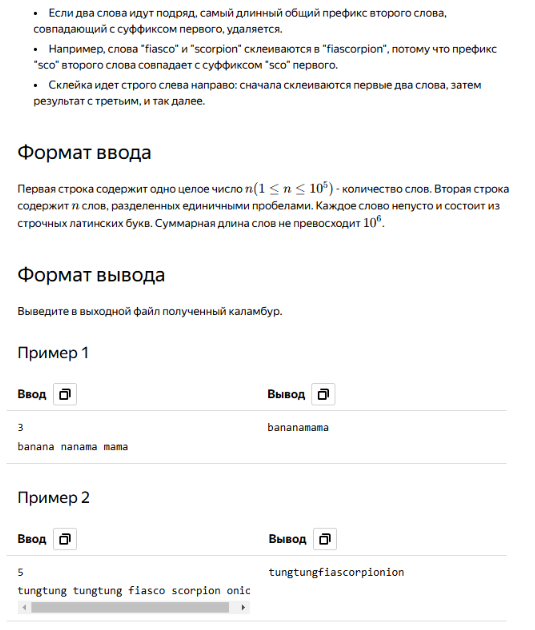

for i in range(min(len(result), len(word)), 0, -1):
Для поиска самого длинного общего префикса
min(len(result), len(word))  возвращает минимальную длину между result и word, чтобы не вылезти за грань наиболее короткого слова
range(..., 0, -1): этот цикл начинает с минимальной длины (рассчитанной выше) и уменьшается на 1 на каждой итерации до тех пор, пока не достигнет 0
То есть -1 - это его шаг

In [ ]:
def task2(words):
    result = words[0]
    for word in words[1:]:
        for i in range(min(len(result), len(word)), 0, -1):
            if result[-i:] == word[:i]:
                result += word[i:]
                break
        else:
            result += word
    return result

n = int(input())
words = input().split()
print(task2(words))

str.endswith(suffix, start, end) - очень полезная штука)

In [36]:
"hello".endswith("lo", 0, 5)

True

In [38]:
"hello".endswith("abc")

False

In [40]:
"hello".endswith("lo", 1, 5)

True

In [42]:
"hello".endswith("lo", 4, 5)

False

In [53]:
print("hello".startswith("he")) 
print("hello".startswith("ho")) 

True
False


In [55]:
print("hello".startswith(("he", "ho")))
print("hello".startswith(("he", "ho", "hi")))

True
True


In [57]:
print("hello".startswith("he", 0, 2)) 
print("hello".startswith("he", 1, 2))

True
False


In [59]:
prefix = "he"
print("hello".startswith(prefix))  

True


In [61]:
if "hello".startswith("he"):
    print("Строка начинается с 'he'")

Строка начинается с 'he'


In [63]:
words = ["hello", "world", "hello world"]
for word in words:
    if word.startswith("he"):
        print(word)

hello
hello world


In [67]:
print("abcde".startswith("A"))

False


In [47]:
def task2(words):
    result = words[0]
    for word in words[1:]:
        for i in range(min(len(result), len(word)), 0, -1):
            if result.endswith(word[:i]):
                result += word[i:]
                break
        else:
            result += word
    return result

n = int(input())
words = input().split()
print(task2(words))

 3
 banana nanama mama


bananamama
